In [1]:
2+5  # shift+enter runs cell

7

In [2]:
import numpy as np

In [3]:
help(np.any)

Help on function any in module numpy.core.fromnumeric:

any(a, axis=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Test whether any array element along a given axis evaluates to True.
    
    Returns single boolean unless `axis` is not ``None``
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a logical OR reduction is performed.
        The default (`axis` = `None`) is to perform a logical OR over all
        the dimensions of the input array. `axis` may be negative, in
        which case it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a reduction is performed on multiple
        axes, instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternate output array in which to place the result.  It must have
        

In [7]:
# Jupyter only
np.any??

In [8]:
np.any  # tab for completion

<function numpy.core.fromnumeric.any>

In [9]:
np.any([])  # shift + tab will show api

False

In [10]:
# In Python everything is True except 
# - 0 values, (0, 0.0, (0+0j))
# - Empty collections ([], (), '', {})
# - False
# - None

In [13]:
track_pth = r"C:\Users\anat.shkolyar\PycharmProjects\pandas_workshop\data\track.csv"

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv(track_pth)  # 1st row assumed header

In [16]:
df.head()  # shows N first lines + header, N=5 as default

,lat,lng,time
0,35.015021,32.519585,2015-08-20 03:48:07.235000+00:00
1,35.014954,32.519606,2015-08-20 03:48:24.734000+00:00
2,35.014871,32.519612,2015-08-20 03:48:25.660000+00:00
3,35.014824,32.519654,2015-08-20 03:48:26.819000+00:00
4,35.014776,32.519689,2015-08-20 03:48:27.828000+00:00


In [17]:
# lat, lng, time - columns
df.columns

Index(['lat', 'lng', 'time'], dtype='object')

In [18]:
# columns are of 'Pandas Series' type, pd.Series
df['lat'].head()

0    35.015021
1    35.014954
2    35.014871
3    35.014824
4    35.014776
Name: lat, dtype: float64

In [19]:
# leftmost 'col' - data frame index
df.index
# in this case - range index, but in pandas indices can be anything, not always numeric \ unique \ consistent

RangeIndex(start=0, stop=740, step=1)

In [20]:
df1 = pd.DataFrame(np.arange(12).reshape(4,3), columns=['c1', 'c2', 'c3'], index=['a', 'a', 'b', 'c'])

In [21]:
df1

,c1,c2,c3
a,0,1,2
a,3,4,5
b,6,7,8
c,9,10,11


In [22]:
df1.loc['a']  # accessing by index using 'loc' can return multiple rows if index is not unique. example - if intex is timestamp and several events occure at same time

,c1,c2,c3
a,0,1,2
a,3,4,5


In [23]:
df1.iloc[0]  # access by location from top

c1    0
c2    1
c3    2
Name: a, dtype: int32

In [25]:
df.dtypes  # column types - we want 'time' to be a timestamp and not object 

lat     float64
lng     float64
time     object
dtype: object

In [26]:
df = pd.read_csv(track_pth, parse_dates=['time'])  # force specific column to be time, setting explicit format may make csv reading much quicker (no explicit format meand pd is "guessing" format from data)
df.dtypes

lat            float64
lng            float64
time    datetime64[ns]
dtype: object

In [27]:
df.loc[10:15]  # slicing - unlike python, INCLUDES THE END INDEX

,lat,lng,time
10,35.014505,32.519599,2015-08-20 03:48:38.839
11,35.014481,32.519514,2015-08-20 03:48:41.980
12,35.014472,32.519486,2015-08-20 03:48:42.725
13,35.014439,32.519405,2015-08-20 03:48:45.896
14,35.014432,32.519379,2015-08-20 03:48:46.662
15,35.014414,32.519309,2015-08-20 03:48:49.829


In [28]:
df.iloc[10:15]  # iloc DOES NOT INCLUDE LAST

,lat,lng,time
10,35.014505,32.519599,2015-08-20 03:48:38.839
11,35.014481,32.519514,2015-08-20 03:48:41.980
12,35.014472,32.519486,2015-08-20 03:48:42.725
13,35.014439,32.519405,2015-08-20 03:48:45.896
14,35.014432,32.519379,2015-08-20 03:48:46.662


In [29]:
# if index is not numeric - lexicographic sorting is applied ('a' < 'b')

In [31]:
hdf = df.head()
hdf.loc[[True, False, True, True, False]]  # boolean indexing, boolean rows on index

,lat,lng,time
0,35.015021,32.519585,2015-08-20 03:48:07.235
2,35.014871,32.519612,2015-08-20 03:48:25.660
3,35.014824,32.519654,2015-08-20 03:48:26.819


In [33]:
hdf.loc[[True, False, True, True, False], ['lat', 'lng']]  # slice on rows and columns

,lat,lng
0,35.015021,32.519585
2,35.014871,32.519612
3,35.014824,32.519654


In [34]:
hdf['time'].dt.second < 10  # checking conditions

0     True
1    False
2    False
3    False
4    False
Name: time, dtype: bool

In [35]:
hdf[hdf['time'].dt.second < 10]  # Accessing by .dt or .str or .cat (where the type of the column matches) gives us more methods for time \ string \ categorical

,lat,lng,time
0,35.015021,32.519585,2015-08-20 03:48:07.235


In [36]:
pd.Timestamp.now().weekday()

0

In [37]:
# working with weekdays in a more readable way with calendar
import calendar
pd.Timestamp.now().weekday() == calendar.MONDAY

True

In [38]:
# combining conditions - | OR, & AND, ~ NOT, parentheses are required!
(hdf['time'].dt.second < 10) | (hdf['time'].dt.second > 25)

0     True
1    False
2    False
3     True
4     True
Name: time, dtype: bool

In [40]:
# query - can be faster than boolean indexing in specific cases (compare both when using)
df.query('time < "2015-08-20 03:48:30"')

,lat,lng,time
0,35.015021,32.519585,2015-08-20 03:48:07.235
1,35.014954,32.519606,2015-08-20 03:48:24.734
2,35.014871,32.519612,2015-08-20 03:48:25.660
3,35.014824,32.519654,2015-08-20 03:48:26.819
4,35.014776,32.519689,2015-08-20 03:48:27.828
5,35.014704,32.519691,2015-08-20 03:48:29.720


In [41]:
# query with variables (string formatting also works!)
df.query('time < @time', {'time': "2015-08-20 03:48:30"'})  # WRONG - GET CORRECT CODE FROM MIKI

SyntaxError: EOL while scanning string literal (<ipython-input-41-eb4bbb26ae6c>, line 2)

In [42]:
# Calculate run speed from data in track_pth
# show boxplot of speed in km\h

In [43]:
%pwd

'C:\\Users\\anat.shkolyar'

In [48]:
# copy dist.py next to notebook to get distance function
from dist import dist as earth_distance

In [45]:
# dist uses numpy functions such as sin, which are universal (work on scalar \ array) and give results in rad
np.sin(90)
np.sin(np.linspace(-5, -5, 10))

array([ 0.95892427,  0.95892427,  0.95892427,  0.95892427,  0.95892427,
        0.95892427,  0.95892427,  0.95892427,  0.95892427,  0.95892427])

In [49]:
# to calculate dist between following points - shift df one step forward and calculate. shift(N) shifts left \ right
dist = earth_distance(df['lat'], df['lng'], df['lat'].shift(), df['lng'].shift())
dist.head()

0         NaN
1    0.007694
2    0.009248
3    0.006479
4    0.006219
dtype: float64

In [52]:
# do the same for time differences
dt = df['time'] - df['time'].shift()
dt.head()

0               NaT
1   00:00:17.499000
2   00:00:00.926000
3   00:00:01.159000
4   00:00:01.009000
Name: time, dtype: timedelta64[ns]

In [54]:
# diff function to do the same as above:
df['time'].diff().head()

0               NaT
1   00:00:17.499000
2   00:00:00.926000
3   00:00:01.159000
4   00:00:01.009000
Name: time, dtype: timedelta64[ns]

In [56]:
# calculate velocity - dist \ time
# speed = dist / dt  # won't work - dividing number by Timedelta variable - we need to convert to seconds before dividing
dt[1].total_seconds() / 3600  # (in Python 2 - 3600.0)

0.004860833333333334

In [57]:
import astropy.units  # adds units to numpy arrays and helps with conversions

In [58]:
# another way to calculate time as scalar (divides the timedelta into sections of 1h. can be 5 min, or 3d - any time unit)
dt[1] / np.timedelta64(1, 'h')

0.0048608333333333333

In [59]:
# final calculation of speed in km/h
dt = df['time'].diff() / np.timedelta64(1, 'h')
speed = dist / dt
speed.head()

0          NaN
1     1.582842
2    35.954340
3    20.123165
4    22.187213
dtype: float64

In [66]:
# the following line asks to show figures from matplotlib in this notebook
%matplotlib inline
# %matplotlib notebook  # not stable yet, allows for zooming, etc,
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')  # change plot style globally

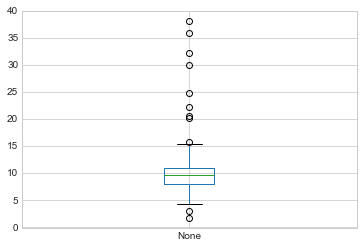

In [67]:
speed.plot.box()  # speed is pandas Series and supports plots from matplotlib

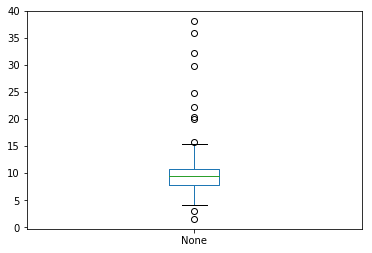

In [62]:
speed.plot.box();  # adding ; suppresses the axes printout

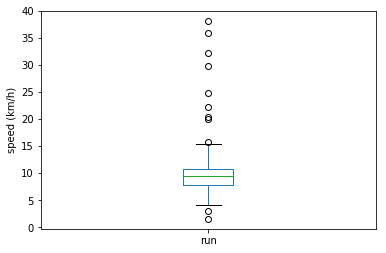

In [65]:
ax = speed.plot.box(label='run')
ax.set_ylabel('speed (km/h)');

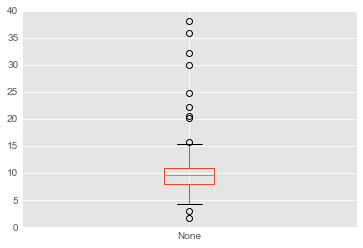

In [68]:
with plt.style.context('ggplot'):  # change plot sytle only for this chart
    speed.plot.box()

In [69]:
# jupyter notebook can be downloaded as python (file --> download as) and then converted into a module that can be used later

In [73]:
# show variables
%who
print('===')
%whos

astropy	 ax	 calendar	 df	 df1	 dist	 dt	 earth_distance	 hdf	 
np	 pd	 plt	 speed	 track_pth	 
===
Variable         Type           Data/Info
-----------------------------------------
astropy          module         <module 'astropy' from 'C<...>s\\astropy\\__init__.py'>
ax               AxesSubplot    Axes(0.125,0.125;0.775x0.755)
calendar         module         <module 'calendar' from '<...>onda3\\lib\\calendar.py'>
df               DataFrame                 lat        lng<...>n\n[740 rows x 3 columns]
df1              DataFrame         c1  c2  c3\na   0   1 <...> 6   7   8\nc   9  10  11
dist             Series         0           NaN\n1      0<...>ngth: 740, dtype: float64
dt               Series         0           NaN\n1      0<...>ngth: 740, dtype: float64
earth_distance   function       <function dist at 0x000002273C0A1D90>
hdf              DataFrame               lat        lng  <...>9 2015-08-20 03:48:27.828
np               module         <module 'numpy' from 'C:\<...>ges\\n

In [74]:
# working with external files
"""
% run <path to file>
% run -n <path to file>
"""

'\n% run <path to file>\n% run -n <path to file>\n'

In [75]:
# conda install -c conda-forge folium

In [76]:
import folium  # map package

In [85]:
m = folium.Map(location=([df['lng'].mean(), df['lat'].mean()]), zoom_start=15)
marker = folium.CircleMarker([df['lng'].mean(), df['lat'].mean()])
marker.add_to(m)
m

In [92]:
# NOTE: for columns where there is no space in the name: df['a'] == df.a
# tha main difference is in adding columns

In [93]:
# use timestamp as index
df = pd.read_csv(track_pth, parse_dates=['time'], index_col='time')
df.head()

,lat,lng
time,,
2015-08-20 03:48:07.235,35.015021,32.519585
2015-08-20 03:48:24.734,35.014954,32.519606
2015-08-20 03:48:25.660,35.014871,32.519612
2015-08-20 03:48:26.819,35.014824,32.519654
2015-08-20 03:48:27.828,35.014776,32.519689


In [96]:
df.loc["2015-08-20 03:48"]  # slicing on time range - using larger resolution on index (.loc can be removed, when its not provided, pd looks for column name and if there's no such column pd looks for the value in index column)

,lat,lng
time,,
2015-08-20 03:48:07.235,35.015021,32.519585
2015-08-20 03:48:24.734,35.014954,32.519606
2015-08-20 03:48:25.660,35.014871,32.519612
2015-08-20 03:48:26.819,35.014824,32.519654
2015-08-20 03:48:27.828,35.014776,32.519689
2015-08-20 03:48:29.720,35.014704,32.519691
2015-08-20 03:48:30.669,35.014657,32.519734
2015-08-20 03:48:33.793,35.014563,32.519719
2015-08-20 03:48:34.869,35.014549,32.519694


In [97]:
# in this case, to calculate time difference we need to cast index as Series
pd.Series(df.index).diff().head()

0               NaT
1   00:00:17.499000
2   00:00:00.926000
3   00:00:01.159000
4   00:00:01.009000
Name: time, dtype: timedelta64[ns]

In [103]:
# resample data frame - you get resampler object
min_df = df.resample('1min')

In [104]:
# what to do with all samples that were discarded to get from resampler to dataframe
min_df = min_df.mean()
min_df

,lat,lng
time,,
2015-08-20 03:48:00,35.014571,32.519485
2015-08-20 03:49:00,35.014316,32.518971
2015-08-20 03:50:00,35.014055,32.517258
2015-08-20 03:51:00,35.013864,32.516264
2015-08-20 03:52:00,35.012744,32.515141
2015-08-20 03:53:00,35.013241,32.514047
2015-08-20 03:54:00,35.012358,32.513381
2015-08-20 03:55:00,35.010811,32.512796
2015-08-20 03:56:00,35.009665,32.512374


In [105]:
# write a function for placing markers per row
def add_marker(row):
    marker = folium.CircleMarker([row['lng'], row['lat']])
    marker.add_to(m)

m = folium.Map(location=([df['lng'].mean(), df['lat'].mean()]), zoom_start=15)
# apply per row
min_df.apply(add_marker, axis=1)
m

In [106]:
# pandas allows conversion between timezones - see in solutions

In [107]:
# extract row from df
df1.iloc[0]  # gives a Series where index is column names and values are column values

c1    0
c2    1
c3    2
Name: a, dtype: int32

In [108]:
df1.iloc[0:1]  # this returns the row as data frame by slicing the indices as reqested

,c1,c2,c3
a,0,1,2


In [109]:
df1.iloc[[0, 2]]  # this slices the indices and returns dataframe

,c1,c2,c3
a,0,1,2
b,6,7,8


In [110]:
df1.loc['a':'b']  # index slicing (loc)

,c1,c2,c3
a,0,1,2
a,3,4,5
b,6,7,8


In [111]:
df1.loc['b':'b']  # requesting a single index

,c1,c2,c3
b,6,7,8
